In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning :::

In [4]:
df_copy = df.copy()

In [5]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df_copy['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
df_copy[df_copy['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
# Drop the non define row based on Category column

In [9]:
df_copy.drop([10472], inplace=True) # drop the row by giving the index number 

In [10]:
df_copy.shape

(10840, 13)

In [11]:
# see the duplicated values and drop the duplicated values
df_copy.duplicated().sum()

483

In [12]:
df_copy.drop_duplicates(inplace=True)

In [13]:
df_copy.reset_index(drop=True,inplace=True) # reset index 

In [14]:
df_copy[df_copy['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
df_copy.shape

(10357, 13)

In [16]:
for i in df_copy.columns:
    print(f'{i}: has unique values : {df_copy[i].unique()}')

App: has unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category: has unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Rating: has unique values : [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
Reviews: has unique values : ['159' '967' '87510'

In [17]:
def size_process(item):
    if str(item)[-1] == 'M':
        res = float(str(item).replace('M', ''))
        res = res*1024
        return res
    elif str(item)[-1] == 'k':
        res = float(str(item).replace('k', ''))
        return res
    else:
        return str(np.NaN)

In [18]:
df_copy['Size'] = df_copy['Size'].apply(size_process)

In [19]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df_copy['Size'].unique()

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0, 'nan',
       9625.6, 15360.0, 10240.0, 1228.8, 26624.0, 8192.0, 8089.6, 57344.0,
       58368.0, 35840.0, 55296.0, 201.0, 3686.4, 5836.8, 8806.4, 2457.6,
       27648.0, 2560.0, 16384.0, 3481.6, 9113.6, 3993.6, 2969.6, 38912.0,
       32768.0, 5529.6, 18432.0, 1126.4, 2252.8, 4608.0, 10035.2, 53248.0,
       9216.0, 6860.8, 30720.0, 2662.4, 7270.4, 3788.8, 22528.0, 7577.6,
       6553.6, 3276.8, 8396.8, 10137.6, 5017.6, 9728.0, 5120.0, 6041.6,
       13312.0, 74752.0, 6963.2, 3584.0, 4096.0, 2355.2, 7372.8, 2150.4,
       43008.0, 7475.2, 9318.4, 56320.0, 23.0, 6656.0, 1536.0, 7680.0,
       52224.0, 41984.0, 49152.0, 8704.0, 47104.0, 8499.2, 4403.2, 4812.8,
       3379.2, 40960.0, 7987.2, 9011.2, 6758.4, 5222.4, 

In [21]:
for i in df_copy.columns:
    print(f'{i}: has unique values : {df_copy[i].unique()}')

App: has unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category: has unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Rating: has unique values : [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
Reviews: has unique values : ['159' '967' '87510'

In [22]:
df_copy['Installs'] = df_copy['Installs'].str.replace('+', '').str.replace(',', '')

In [23]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [24]:
df_copy['Installs'].astype(int)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10352        5000
10353         100
10354        1000
10355        1000
10356    10000000
Name: Installs, Length: 10357, dtype: int32

In [25]:
for i in df_copy.columns:
    print(f'{i}: has unique values : {df_copy[i].unique()}')

App: has unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category: has unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Rating: has unique values : [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
Reviews: has unique values : ['159' '967' '87510'

In [26]:
df_copy['Price'] = df_copy['Price'].str.replace('$', '')

In [27]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [28]:
df_copy['Price'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10352    0.0
10353    0.0
10354    0.0
10355    0.0
10356    0.0
Name: Price, Length: 10357, dtype: float64

In [29]:
for i in df_copy.columns:
    print(f'{i}: has unique values : {df_copy[i].unique()}')

App: has unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category: has unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Rating: has unique values : [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
Reviews: has unique values : ['159' '967' '87510'

In [30]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [31]:
df_copy['day'] = df_copy['Last Updated'].dt.day
df_copy['month'] = df_copy['Last Updated'].dt.month
df_copy['year'] = df_copy['Last Updated'].dt.year

In [32]:
# drop the 'last Updated' column:

In [33]:
df_copy.drop('Last Updated', axis=1, inplace=True)

In [34]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [35]:
df_copy['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [36]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [37]:
df_copy['Android Ver'] = df_copy['Android Ver'].str.replace('and up', '').str.replace('Varies with device', '').str.replace('W', '')

In [38]:
df_copy['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '7.1 ', '7.0 - 7.1.1',
       '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ', '4.1 - 7.1.1', nan,
       '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [39]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
day                 int32
month               int32
year                int32
dtype: object

In [40]:
for i in df_copy.columns:
    print(f'{i}: has unique values : {df_copy[i].unique()}')

App: has unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category: has unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Rating: has unique values : [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
Reviews: has unique values : ['159' '967' '87510'

In [41]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)
df_copy['Size'] = df_copy['Size'].astype(float)
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [42]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
day                 int32
month               int32
year                int32
dtype: object

# Outliers and null values treatments 

In [43]:
cat_type = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
int_type = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [44]:
cat_type

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [45]:
int_type

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

<Axes: >

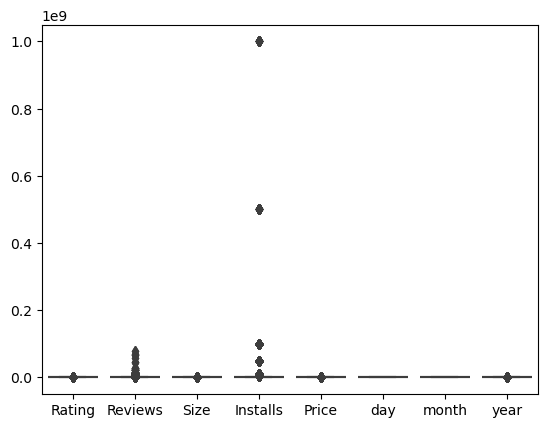

In [46]:
sns.boxplot(df_copy[int_type])

In [47]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018


In [48]:

th_5 = df_copy['Installs'].quantile(0.05)
Q1 = df_copy['Installs'].quantile(0.25)
Q2 = df_copy['Installs'].quantile(0.50)
Q3 = df_copy['Installs'].quantile(0.75)
th_95 = df_copy['Installs'].quantile(0.95)
IQR = Q3 - Q1
lf = Q1 - 1.5*IQR
uf = Q3 + 1.5*IQR
df_copy['Installs'] = np.where(df_copy['Installs'] <= lf, th_5,
        np.where(df_copy['Installs'] > uf, th_95, df_copy['Installs']))


<Axes: >

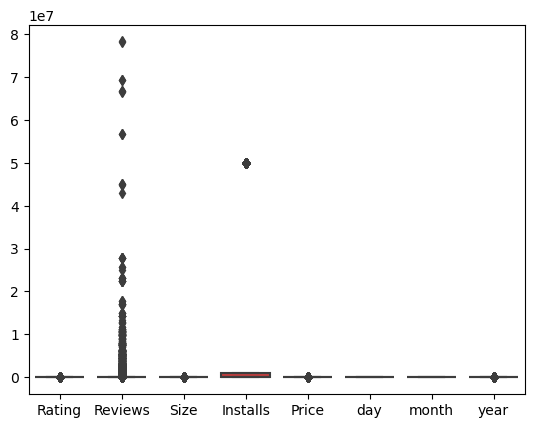

In [49]:
sns.boxplot(df_copy[int_type])

In [50]:
th_5 = df_copy['Reviews'].quantile(0.05)
Q1 = df_copy['Reviews'].quantile(0.25)
Q2 = df_copy['Reviews'].quantile(0.50)
Q3 = df_copy['Reviews'].quantile(0.75)
th_95 = df_copy['Reviews'].quantile(0.95)
IQR = Q3 - Q1
lf = Q1 - 1.5*IQR
uf = Q3 + 1.5*IQR
df_copy['Reviews'] = np.where(df_copy['Reviews'] <= lf, th_5,
        np.where(df_copy['Reviews'] > uf, th_95, df_copy['Reviews']))

<Axes: >

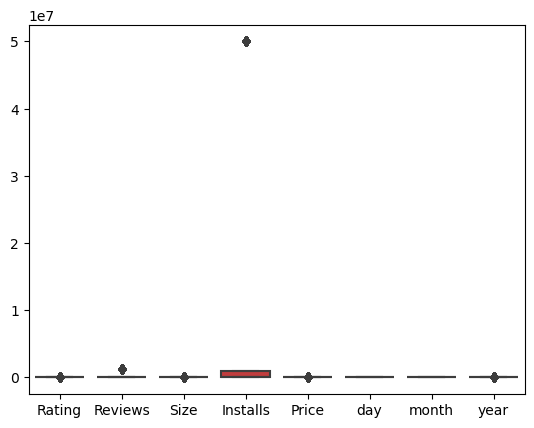

In [51]:
sns.boxplot(df_copy[int_type])

In [52]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [53]:
df_copy['Rating'] = df_copy['Rating'].fillna(df_copy['Rating'].mean())
df_copy['Size'] = df_copy['Size'].fillna(df_copy['Size'].mean())

In [54]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
day               0
month             0
year              0
dtype: int64

In [55]:
df_copy.dropna(subset = ['Type','Current Ver'],inplace=True)

In [56]:
df_copy.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       2
day               0
month             0
year              0
dtype: int64

In [57]:
df_copy.dropna(subset=['Android Ver'],inplace=True)
df_copy.drop('Current Ver',axis = 1, inplace = True)

In [58]:
df_copy.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Android Ver       0
day               0
month             0
year              0
dtype: int64

In [59]:
df_copy.reset_index(drop=True,inplace=True)

In [60]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,Free,0.0,Everyone,Art & Design,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,50000000.0,Free,0.0,Everyone,Art & Design,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,1335888.4,25600.0,50000000.0,Free,0.0,Teen,Art & Design,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000.0,Free,0.0,Everyone,Art & Design;Creativity,4.4,20,6,2018


 # DATA ENCODING :

In [61]:
df_copy['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [62]:
df_copy['Type'] = df_copy['Type'].map({'Free':1,
                    'Paid':0})

In [63]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,1,0.0,Everyone,Art & Design,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,1,0.0,Everyone,Art & Design;Pretend Play,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,50000000.0,1,0.0,Everyone,Art & Design,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,1335888.4,25600.0,50000000.0,1,0.0,Teen,Art & Design,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000.0,1,0.0,Everyone,Art & Design;Creativity,4.4,20,6,2018


In [64]:
df_copy['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [65]:
# ORDINAL ENCODING ::

In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
ordinal = OrdinalEncoder(categories=[['Everyone 10+','Teen','Mature 17+','Adults only 18+','Unrated','Everyone']])

In [68]:
df_copy['Content Rating'] = ordinal.fit_transform(df_copy[['Content Rating']])

In [69]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,1,0.0,5.0,Art & Design,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,1,0.0,5.0,Art & Design;Pretend Play,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,50000000.0,1,0.0,5.0,Art & Design,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,1335888.4,25600.0,50000000.0,1,0.0,1.0,Art & Design,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000.0,1,0.0,5.0,Art & Design;Creativity,4.4,20,6,2018


In [70]:
df_copy['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [71]:
# TARGET GUIDED ORDINAL ENCODING ::

In [72]:
mean_price = df_copy.groupby('Category')['Rating'].mean().round(1).to_dict()

In [73]:
mean_price

{'ART_AND_DESIGN': 4.4,
 'AUTO_AND_VEHICLES': 4.2,
 'BEAUTY': 4.3,
 'BOOKS_AND_REFERENCE': 4.3,
 'BUSINESS': 4.1,
 'COMICS': 4.2,
 'COMMUNICATION': 4.2,
 'DATING': 4.0,
 'EDUCATION': 4.4,
 'ENTERTAINMENT': 4.1,
 'EVENTS': 4.4,
 'FAMILY': 4.2,
 'FINANCE': 4.1,
 'FOOD_AND_DRINK': 4.2,
 'GAME': 4.3,
 'HEALTH_AND_FITNESS': 4.3,
 'HOUSE_AND_HOME': 4.2,
 'LIBRARIES_AND_DEMO': 4.2,
 'LIFESTYLE': 4.1,
 'MAPS_AND_NAVIGATION': 4.1,
 'MEDICAL': 4.2,
 'NEWS_AND_MAGAZINES': 4.1,
 'PARENTING': 4.3,
 'PERSONALIZATION': 4.3,
 'PHOTOGRAPHY': 4.2,
 'PRODUCTIVITY': 4.2,
 'SHOPPING': 4.2,
 'SOCIAL': 4.2,
 'SPORTS': 4.2,
 'TOOLS': 4.1,
 'TRAVEL_AND_LOCAL': 4.1,
 'VIDEO_PLAYERS': 4.1,
 'WEATHER': 4.2}

In [74]:
df_copy[' Encoded Category'] = df_copy['Category'].map(mean_price)

In [75]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,day,month,year,Encoded Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,1,0.0,5.0,Art & Design,4.0.3,7,1,2018,4.4
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,1,0.0,5.0,Art & Design;Pretend Play,4.0.3,15,1,2018,4.4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,50000000.0,1,0.0,5.0,Art & Design,4.0.3,1,8,2018,4.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,1335888.4,25600.0,50000000.0,1,0.0,1.0,Art & Design,4.2,8,6,2018,4.4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000.0,1,0.0,5.0,Art & Design;Creativity,4.4,20,6,2018,4.4


In [76]:
df_copy['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [77]:
df_copy['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [78]:
# Drop the 'Genres' column which is almost similar to 'Category' column..

In [79]:
df_copy.drop('Genres', axis=1, inplace = True)

In [80]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,day,month,year,Encoded Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,1,0.0,5.0,4.0.3,7,1,2018,4.4
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,1,0.0,5.0,4.0.3,15,1,2018,4.4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,50000000.0,1,0.0,5.0,4.0.3,1,8,2018,4.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,1335888.4,25600.0,50000000.0,1,0.0,1.0,4.2,8,6,2018,4.4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000.0,1,0.0,5.0,4.4,20,6,2018,4.4


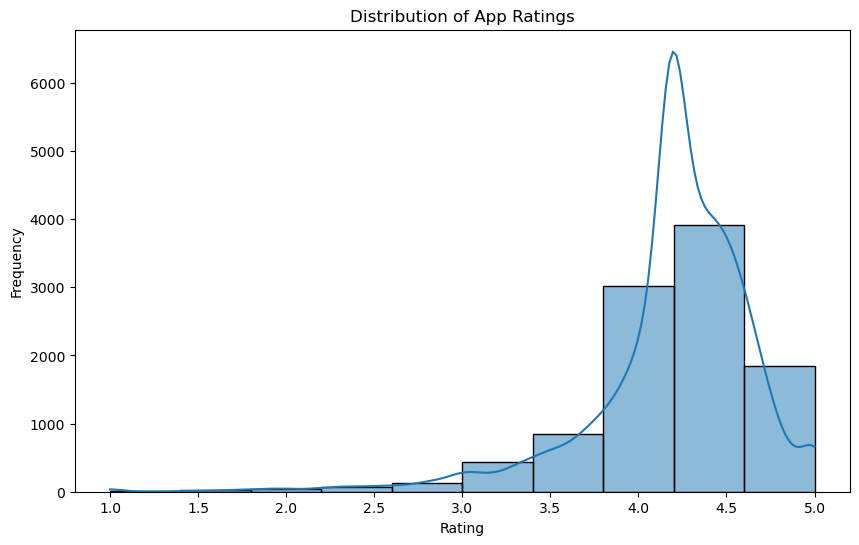

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['Rating'], bins=10, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


The Distribution of app Rating is left skewed ..


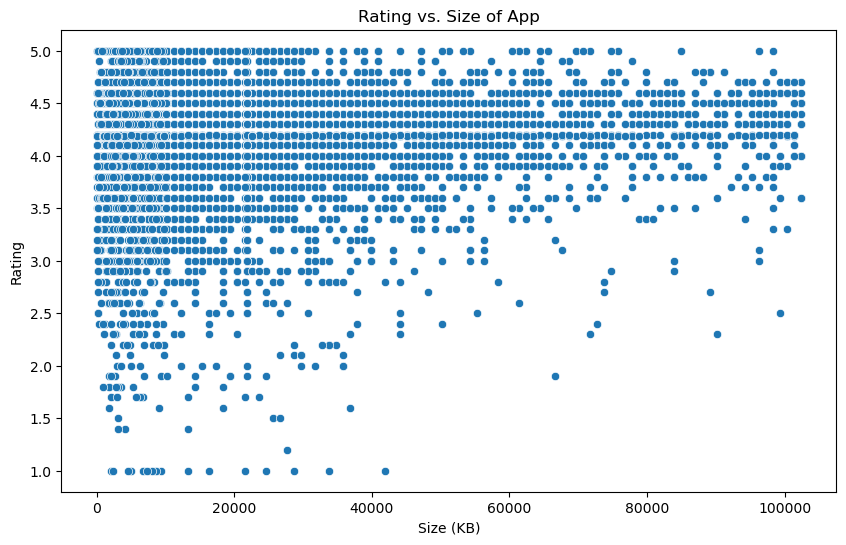

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df_copy)
plt.title('Rating vs. Size of App')
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.show()


Most of app rated between 3-5 and size within 40Mb

In [83]:
avg_rating_by_content_rating = df_copy.groupby('Content Rating')['Rating'].mean().round(2)
print("Average Rating by Content Rating:\n", avg_rating_by_content_rating)

Average Rating by Content Rating:
 Content Rating
0.0    4.25
1.0    4.23
2.0    4.13
3.0    4.30
4.0    4.14
5.0    4.18
Name: Rating, dtype: float64


All of the unique Content Rating values have same Rating :

# Objective: Develop a predictive model to determine the rating of an app based on its characteristics. This model will help app developers and marketers understand the key factors that influence app ratings on the Google Play Store ?

In [84]:
# X AND Y DISTRIBUTION ::

In [85]:
X = df_copy[['Reviews','Size','Type','Price','Installs','Content Rating','Android Ver']]
Y = df_copy['Rating']

In [86]:
X

,Reviews,Size,Type,Price,Installs,Content Rating,Android Ver
0,159.0,19456.000000,1,0.0,10000.0,5.0,4.0.3
1,967.0,14336.000000,1,0.0,500000.0,5.0,4.0.3
2,87510.0,8908.800000,1,0.0,50000000.0,5.0,4.0.3
3,1335888.4,25600.000000,1,0.0,50000000.0,1.0,4.2
4,967.0,2867.200000,1,0.0,100000.0,5.0,4.4
...,...,...,...,...,...,...,...
10341,38.0,54272.000000,1,0.0,5000.0,5.0,4.1
10342,4.0,3686.400000,1,0.0,100.0,5.0,4.1
10343,3.0,9728.000000,1,0.0,1000.0,5.0,2.2
10344,114.0,21798.311052,1,0.0,1000.0,2.0,


In [87]:
Y

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10341    4.500000
10342    5.000000
10343    4.187877
10344    4.500000
10345    4.500000
Name: Rating, Length: 10346, dtype: float64

In [88]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [89]:
# TRAIN TEST SPLIT ::
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [90]:
X_train

,Reviews,Size,Type,Price,Installs,Content Rating,Android Ver
2401,1335888.4,21798.311052,1,0.0,50000000.0,1.0,
7899,1.0,4608.000000,1,0.0,500.0,5.0,4.1
7640,2250.0,30720.000000,1,0.0,100000.0,5.0,4.1
119,75.0,4300.800000,1,0.0,50000.0,5.0,4.0.3
4770,44.0,2867.200000,1,0.0,100.0,5.0,4.1
...,...,...,...,...,...,...,...
2895,24265.0,3379.200000,1,0.0,1000000.0,5.0,4.0.3
7813,1335888.4,21798.311052,1,0.0,50000000.0,5.0,
905,6076.0,32768.000000,1,0.0,500000.0,5.0,4.2
5192,16521.0,23552.000000,1,0.0,1000000.0,5.0,2.3


In [91]:
y_train

2401    4.6
7899    5.0
7640    4.3
119     4.4
4770    5.0
       ... 
2895    4.4
7813    4.5
905     4.2
5192    3.6
235     4.3
Name: Rating, Length: 7242, dtype: float64

In [92]:
X_test

,Reviews,Size,Type,Price,Installs,Content Rating,Android Ver
7370,431.0,17408.0,1,0.0,10000.0,5.0,4.0
3903,198.0,9318.4,1,0.0,10000.0,5.0,5.0
2793,1609.0,4096.0,1,0.0,100000.0,5.0,4.1
1988,171.0,20480.0,0,10.0,10000.0,0.0,4.1
2106,275.0,5939.2,1,0.0,10000.0,0.0,4.4
...,...,...,...,...,...,...,...
9424,1.0,1536.0,1,0.0,10.0,5.0,4.3
10122,14221.0,1843.2,1,0.0,1000000.0,1.0,2.3.3
1556,70226.0,38912.0,1,0.0,50000000.0,5.0,4.1
4106,1.0,3481.6,1,0.0,10.0,5.0,4.0.3


In [93]:
y_test

7370     4.400000
3903     4.900000
2793     4.200000
1988     4.500000
2106     4.400000
           ...   
9424     4.187877
10122    4.500000
1556     4.200000
4106     4.187877
8677     3.400000
Name: Rating, Length: 3104, dtype: float64

In [94]:
# FEATURES SCALING FOR NUMERICAL COLUMNS :: 

In [95]:
num_col = ['Installs','Reviews','Size']

In [96]:
num_pipeline = Pipeline(steps=[('scaling',StandardScaler())])

In [97]:
preprocessor = ColumnTransformer([('num_pipeline', num_pipeline, num_col)])

In [98]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [99]:
X_train

array([[ 1.7296098 ,  2.11160668,  0.00477866],
       [-0.58940604, -0.49416591, -0.80773687],
       [-0.58479116, -0.48977902,  0.42647032],
       ...,
       [-0.56623884, -0.48231605,  0.52327088],
       [-0.54304845, -0.46194211,  0.08766834],
       [ 1.7296098 , -0.43699012, -0.0575325 ]])

In [100]:
X_test

array([[-0.58896543, -0.49332715, -0.20273335],
       [-0.58896543, -0.49378164, -0.58509558],
       [-0.58479116, -0.49102935, -0.83193701],
       ...,
       [ 1.7296098 , -0.35718551,  0.81367257],
       [-0.58942877, -0.49416591, -0.86097718],
       [-0.58479116, -0.48540969,  3.4272878 ]])

In [101]:
## Model Trainning ::

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [108]:
models = {"support vector Regressor": SVR(),
         "DT Regressor": DecisionTreeRegressor(),
          "Multiple Linear regression": LinearRegression(),
         "Random_forest_Regressor": RandomForestRegressor()}

In [109]:
from sklearn.metrics import r2_score
def model_train_eval(X_train, y_train, X_test, y_test, models):
    evaluation = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_score = r2_score(y_test, y_pred)
        evaluation[list(models.keys())[i]] = model_score
    return evaluation

In [110]:
model_train_eval(X_train, y_train, X_test, y_test, models)

{'support vector Regressor': 0.027361773915910326,
 'DT Regressor': -0.753476041612867,
 'Multiple Linear regression': 0.033478307752545344,
 'Random_forest_Regressor': -0.029914583169545983}